In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 
import pandas as pd
import scipy

In [3]:
#Makse a serie with all the value from a file called delay.txt with one value each line 
def make_serie(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        lines = [float(line.strip()) for line in lines]
        return pd.Series(lines)

make_serie('delay.txt')

0     0.458723
1     0.396473
2     0.365038
3     0.310752
4     0.148016
5     0.296576
6     0.369286
7     0.378950
8     0.412249
9     0.507524
10    0.420835
11    0.401881
12    0.282730
13    0.257060
14    0.230474
15    0.253310
16    0.256343
17    0.139200
18    0.107785
19    0.222601
20    0.207785
21    0.236481
22    0.185038
23    0.079959
24    0.051296
25    0.024906
26    0.022074
27    0.013120
28    0.025502
29    0.080000
30    0.022479
31    0.158705
32    0.056045
33    0.035799
34    0.211100
35    0.124777
36    0.056186
37    0.026431
38    0.162910
39    0.067192
40    0.017034
41    0.038028
42    0.052708
dtype: float64

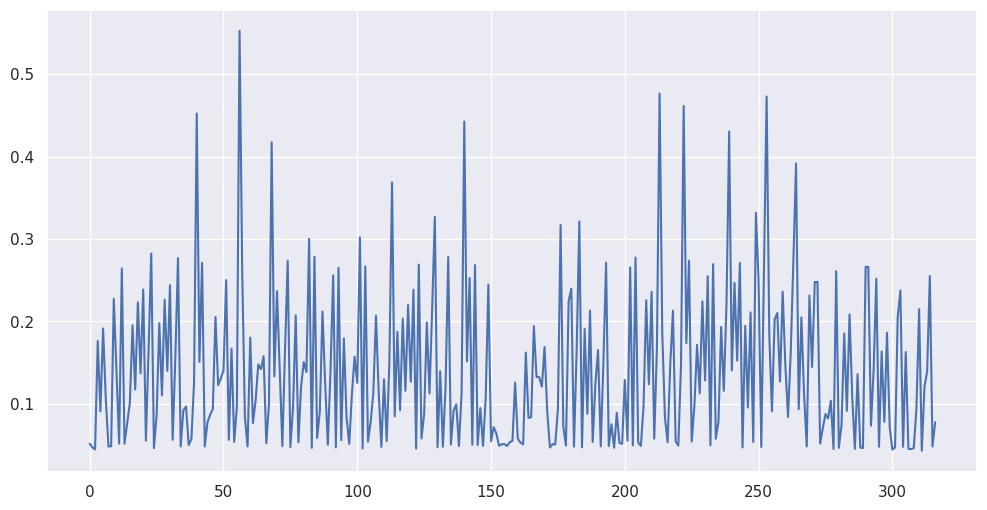

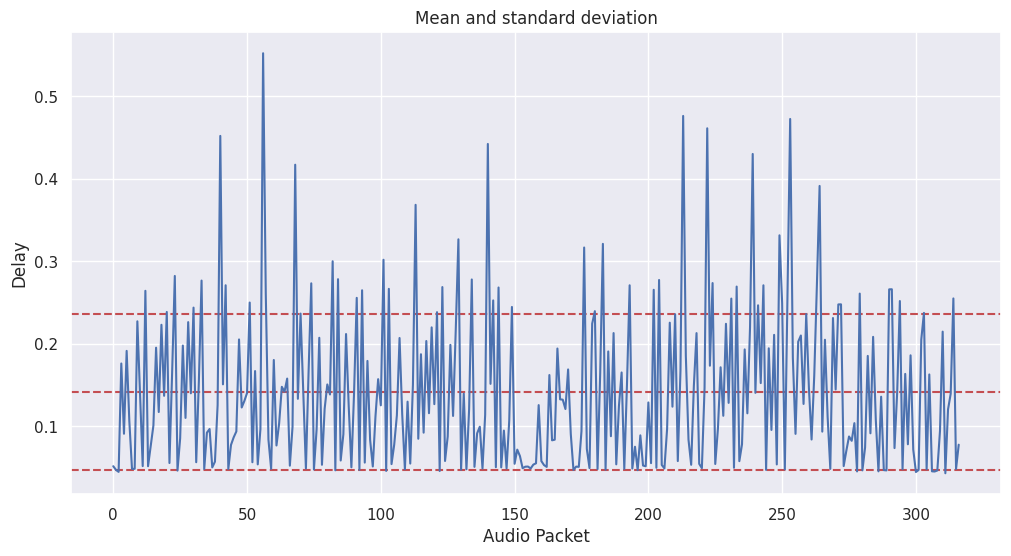

In [16]:
#display a graph with all value from a serie
#change format of the display with seaborn
def display_graph(serie):
    sb.set()
    plt.figure(figsize=(12, 6))
    plt.plot(serie)
    plt.show()

display_graph(make_serie('delay.txt'))

#display in a nice way the mean and the standard deviation of a serie with seaborn
#add a title to the graph
#add label for x and y axis

def display_mean_std(serie):
    sb.set()
    plt.figure(figsize=(12, 6))
    plt.title('Mean and standard deviation')
    plt.xlabel('Audio Packet')
    plt.ylabel('Delay (ms)')
    plt.axhline(serie.mean(), color='r', linestyle='--')
    plt.axhline(serie.mean() + serie.std(), color='r', linestyle='--')
    plt.axhline(serie.mean() - serie.std(), color='r', linestyle='--')
    plt.plot(serie)
    plt.show()

display_mean_std(make_serie('delay.txt'))


In [13]:
#calculate the mean of a serie and the interval of confidence
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

mean_confidence_interval(make_serie('delay.txt'))


(0.14152366430601487, 0.13103620417938708, 0.15201112443264267)

In [7]:
import json

# Données encodées en format JSON
data_encoded = b'{"audio_data": [0.123, 0.456, 0.789]}'

# Décodage des données
data_decoded = json.loads(data_encoded.decode('utf-8'))

# Extraction des données audio
audio_data = data_decoded['audio_data']

# Calcul de la taille du paquet audio
packet_size = len(audio_data) * 8 # 8 bits par flottant


In [9]:
data_decoded

{'audio_data': [0.123, 0.456, 0.789]}